In [22]:
using PyPlot
using Distributions
using StatsBase

In [1]:
using FakeGeno
using HDF5

In [107]:
pop, dosage, COR, Nsnp, Nind = h5open("samplepop.hdf5","r") do x
    convert(Matrix{Bool},read(x,"pop")), convert(Matrix{Int},read(x, "dosage")), read(x, "COR"), read(x, "Nsnp"), read(x, "Nind")
end;

In [140]:
function assign_cases(dosage::Matrix, risksnpfraction::Float64,casesfraction::Float64)
    Nsnp, Nind = size(dosage)
    Nrisk = Int(risksnpfraction*Nsnp)
    
    riskind = sample(1:Nsnp,Nrisk,replace=false)
    risk = zeros(Float64,Nsnp)
    risk[riskind] = rand(Nrisk) + 0.5

    score = Array(Float64,Nind)
    for i in 1:Nind
        score[i]=dot(risk, dosage[:,i])
    end 

    casesind = sortperm(score, rev=true)[1:Int(casesfraction*Nind)]
    cases = zeros(Bool,Nind)
    cases[casesind] = true 
    
    risk, cases
end

risk, cases = assign_cases(dosage, 0.01, 0.4);

In [141]:
zscores = GWAS(dosage,cases);

calculating GWAS z-scores ...100% Time: 0:00:02


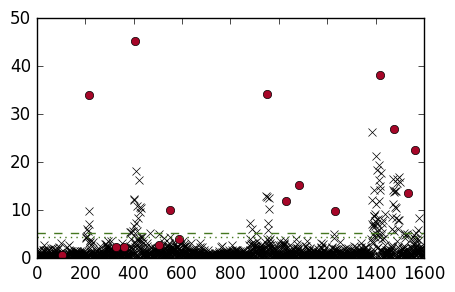

In [147]:
manhattanplot(zscores, risk .> 0);

In [129]:
describe(risk)

Summary Stats:
Mean:         0.099034
Minimum:      0.000000
1st Quartile: 0.000000
Median:       0.000000
3rd Quartile: 0.000000
Maximum:      1.499585


In [31]:
mean(zscores[~isnan(zscores)])

0.09990436623301119

In [26]:
zscores

1600-element Array{Float64,1}:
  0.423467
 -0.572844
  1.22865 
 -1.99429 
 -0.320032
 -0.27865 
 -1.97898 
  3.01886 
 -1.14312 
  1.09587 
 -1.97854 
  0.271701
 -0.234467
  ⋮       
  0.286912
 -0.816275
 -0.423857
  0.235954
 -0.383793
  1.7391  
 -0.555208
 -0.503242
 -2.43367 
 -2.25748 
  2.33007 
 -1.70233 